In [52]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
# import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
# import alpaca_trade_api as tradeapi
import hvplot.pandas
import locale
locale.setlocale( locale.LC_ALL, 'en_CA.UTF-8' )
%matplotlib inline
import yfinance as yf

## Create and Analyse Your Desired Portfolio

In [109]:
#Define Global Variables
# Number of simulations
# Benchmark
number_simulations = 500 #1000 # columns
number_records =30*252# rows

### Prompt User for list of stocks

In [38]:
# User list of stocks
user_portfolio_name = ["MSFT", "AAPL", "AMZN","GOOGL","FB", "V", "JPM"]

#Set benchmark for portfolio
benchmark=["SPY"]

## Import Data

In [65]:
list_of_tickers=benchmark+user_portfolio_name

data = yf.download(
        tickers = list_of_tickers,
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        period = "30y",
        interval = "1d",
        group_by = 'ticker',
        # adjust all OHLC automatically, adjusted for stock splits
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )
data.tail()

[*********************100%***********************]  8 of 8 completed


FB                                                  \
                  Open        High         Low       Close      Volume   
Date                                                                     
2020-05-07  211.160004  211.600006  209.039993  211.259995  15152000.0   
2020-05-08  212.240005  213.210007  210.850006  212.350006  12524000.0   
2020-05-11  210.889999  215.000000  210.369995  213.179993  12893100.0   
2020-05-12  213.289993  215.279999  210.000000  210.100006  14704600.0   
2020-05-13  209.429993  210.779999  202.110001  205.100006  20654500.0   

                   AMZN                                                    \
                   Open         High          Low        Close     Volume   
Date                                                                        
2020-05-07  2374.780029  2376.000000  2343.110107  2367.610107  3396400.0   
2020-05-08  2372.139893  2387.239990  2357.000000  2379.610107  3211200.0   
2020-05-11  2374.699951  2419.669922  2372.110107  2409.000000  3253700.0   
2020-05-12  2411.850098  2419.000000  2355.000000  2356.949951  3074900.0   
2020-05-13  2366.800049  2407.699951  2337.800049  2367.919922  4775200.0   

            ...        MSFT                                                \
            ...        Open        High         Low       Close    Volume   
Date        ...                                                             
2020-05-07  ...  184.169998  184.550003  182.580002  183.600006  28316000   
2020-05-08  ...  184.979996  185.000000  183.360001  184.679993  30912600   
2020-05-11  ...  183.149994  187.509995  182.850006  186.740005  30809400   
2020-05-12  ...  186.800003  187.039993  182.300003  182.509995  32038200   
2020-05-13  ...  182.550003  184.050003  176.539993  179.750000  44650800   

                  JPM                                             
                 Open       High        Low      Close    Volume  
Date                                                              
2020-05-07  91.339996  92.910004  90.580002  91.209999  16771900  
2020-05-08  92.800003  94.080002  92.110001  92.699997  20494900  
2020-05-11  91.110001  91.110001  89.330002  89.970001  31872000  
2020-05-12  90.150002  90.790001  86.900002  87.029999  27962900  
2020-05-13  86.379997  86.860001  83.400002  84.029999  35434000  

[5 rows x 40 columns]

## Data cleanup

In [117]:
# Historic adjusted close prices
df_yf = data.sort_index()
df_yf.drop(columns=['Open', 'High', 'Low', 'Volume'], level=1, inplace=True)
df_yf = df_yf.droplevel(axis=1, level=1)
df_yf.index = df_yf.index.date
df_yf.dropna(inplace=True)
df_yf.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [57]:
# Isolate cleaned data
user_portfolio_df=df_yf.drop([benchmark[0]], axis =1)
bm_portfolio_df=df_yf[benchmark[0]]

# Calculate daily returns
user_portfolio_returns = user_portfolio_df.pct_change().dropna()
bm_portfolio_returns = bm_portfolio_df.pct_change().dropna()

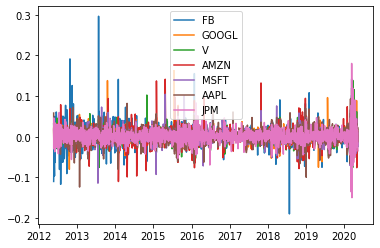

In [128]:
user_portfolio_returns

## Define variables for Benchmark simulation

In [58]:
bm_portfolio_ret_mean = bm_portfolio_returns.mean()
bm_portfolio_ret_std = bm_portfolio_returns.std()
bm_last_price = bm_portfolio_df[-1]

#TODO provide clear message to user, round to two decimal points
#we might want to illustrate what standard deviation means
print(f'Your portfolio average return from SD to ED is:{bm_portfolio_ret_mean}')
print(f'Your portfolio standard deviation from SD to ED is:{bm_portfolio_ret_std}')
print(f'The present value of your benchmark is from SD to ED is:{bm_last_price}')

Your portfolio average return from SD to ED is:0.0005202019083896835
Your portfolio standard deviation from SD to ED is:0.010352859540208157
The present value of your benchmark is from SD to ED is:281.6000061035156


In [122]:
simulated_benchmark_prices[-1]
bm_portfolio_ret_std

0.010352859540208157

In [125]:
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(number_simulations):

    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_jnj_prices = [bm_last_price]
#     simulated_mu_prices = [mu_last_price]
    
    # Simulate the returns for 252 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_jnj_price = simulated_jnj_prices[-1] * (1 + np.random.normal(bm_portfolio_ret_mean, bm_portfolio_ret_std))
#         simulated_mu_price = simulated_mu_prices[-1] * (1 + np.random.normal(avg_daily_return_mu, std_dev_daily_return_mu))
        
        # Append the simulated price to the list
        simulated_jnj_prices.append(simulated_jnj_price)
#         simulated_mu_prices.append(simulated_mu_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["JNJ prices"] = pd.Series(simulated_jnj_prices)
#     simulated_price_df["MU prices"] = pd.Series(simulated_mu_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% JNJ; 40% MU)
    weights = [1.00]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999183,0.995597,1.003169,0.999836,0.997215,0.995517,1.000423,0.985839,0.995591,1.010394,...,0.974750,1.008823,1.008581,1.009688,1.011746,1.008732,0.987557,1.003820,0.996831,1.005948
2,0.994853,0.998325,0.990323,1.000810,0.990182,1.000383,1.012083,0.997588,0.990301,1.009968,...,0.990582,1.026912,0.998503,1.006830,1.008708,1.020471,0.992350,0.990726,0.983874,1.000987
3,0.996447,0.994255,0.976704,1.021072,1.027273,1.001163,1.013822,1.004756,0.973205,1.003146,...,1.005403,1.027460,1.002609,1.001175,0.991855,1.029631,0.983277,0.995826,0.983847,1.004789
4,1.004700,0.981207,0.975842,1.005016,1.031345,1.003968,1.002683,1.013944,0.968786,0.983158,...,0.993373,1.026800,0.992868,0.989027,0.985527,1.019626,0.987446,0.998095,0.978212,0.994422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,43.007655,36.614015,79.675445,19.506005,18.281568,143.746472,357.959362,71.671911,42.660454,104.145004,...,60.126150,57.022161,38.873529,51.913785,16.246928,13.844974,88.111927,16.600567,99.838542,10.317229
7557,42.704702,36.062331,77.844005,19.295615,18.293430,143.143699,361.350922,72.250037,42.965313,103.167222,...,59.341177,57.213081,38.866893,51.141424,15.876581,13.831892,87.844648,16.678003,101.152002,10.281540
7558,42.651756,35.759798,78.024441,19.029110,18.216507,142.445307,361.388356,72.516244,42.851624,103.245426,...,59.989408,57.087632,39.714869,51.648598,16.209081,13.880990,87.648774,16.480528,103.314596,10.236727
7559,43.255959,35.492842,77.523596,18.942668,18.435872,141.676083,360.902878,71.934180,43.179920,104.406313,...,60.411011,56.889567,39.258674,51.512687,16.315188,13.892749,87.725079,16.667820,103.523333,10.395184


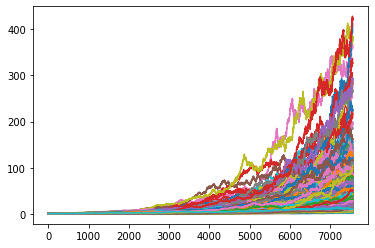

In [127]:
portfolio_cumulative_returns.plot(legend=None)

## Run BM Monte Carlo Simulation

In [120]:
# Global variables being used
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
bm_montecarlo_returns = pd.DataFrame()

# Run the simulation of projecting stock prices
for n in range(number_simulations):
    simulated_benchmark_prices = [bm_last_price]
    for i in range(number_records):
        simulated_benchmark_price = simulated_benchmark_prices[-1] * (1 + np.random.normal(bm_portfolio_ret_mean, bm_portfolio_ret_std))
        simulated_benchmark_prices.append(simulated_benchmark_price)
    simulated_price_df["SPY prices"] = pd.Series(simulated_benchmark_prices)
    simulated_daily_returns = simulated_price_df.pct_change()
    b_weights = [1.00] 
    portfolio_daily_returns = simulated_daily_returns.dot(b_weights)
    bm_montecarlo_returns[f'T{n}'] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
bm_montecarlo_returns

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T490,T491,T492,T493,T494,T495,T496,T497,T498,T499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992360,1.010753,1.015530,1.005290,1.000371,1.005589,1.001534,0.997113,1.003259,0.986541,...,0.988317,0.988564,1.017879,0.990389,0.987812,1.003166,1.002451,1.015480,1.010194,1.000704
2,0.992071,1.030138,1.005377,0.998824,0.984154,1.003322,0.989768,1.005506,0.999482,0.980366,...,0.980345,0.995474,1.019363,1.011349,0.983737,1.008375,1.001767,1.027948,1.007389,0.997145
3,0.958183,1.048928,1.000471,1.016632,0.992630,0.989775,0.967405,1.010835,1.006664,0.977756,...,0.969340,0.978529,1.027273,0.987059,0.985317,0.998724,0.995467,1.035440,0.996876,1.000360
4,0.949444,1.049245,0.997909,1.029207,0.996462,0.979111,0.958591,1.010484,1.024393,0.983666,...,0.959123,0.961805,1.032619,0.991188,0.968529,0.999749,1.014763,1.051322,1.005766,0.998965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,94.663158,93.821747,7.242856,11.691405,65.265570,62.932580,19.475020,22.184696,35.010301,41.436594,...,35.695518,132.664909,71.746233,42.175153,13.583850,151.593657,81.590892,16.914397,101.800752,164.517116
7557,94.181234,94.241957,7.395174,11.542070,65.600724,63.758719,19.264805,22.164246,34.719193,40.617442,...,35.893047,132.654630,71.733590,41.622879,13.409498,151.792235,82.332034,16.784846,101.840500,161.264074
7558,94.932426,94.683444,7.420460,11.678511,65.942091,63.820789,19.077268,22.532672,34.384672,39.998938,...,35.572506,131.976788,72.125525,41.851201,13.522344,151.824769,82.404744,16.865041,100.005014,158.908394
7559,97.535496,95.070978,7.670593,11.504991,66.565851,63.859650,19.202253,22.884291,34.369880,38.864139,...,35.424301,131.580621,72.375228,42.740234,13.516341,152.199830,82.271281,17.082226,100.119292,158.899107


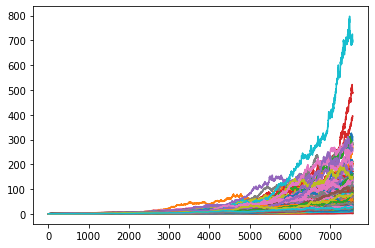

In [116]:
bm_montecarlo_returns.plot(legend=None)

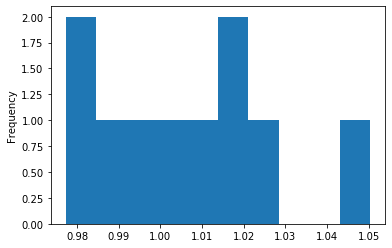

In [108]:
bm_cumulative_ret=bm_montecarlo_returns.iloc[-1, :]
bm_cumulative_ret.plot(kind='hist', bins=10)

## Define variables for Portfolio simulation

In [97]:
pf_means = {}
pf_std = {}
pf_last_day = {}

for stock in user_portfolio_name:
    pf_means[stock] = user_portfolio_returns.mean()[stock]
    pf_std[stock] = user_portfolio_returns.std()[stock]
    pf_last_day[stock] = user_portfolio_df[stock][-1]
#TODO Create a table to display this information for the user
pf_last_day

{'MSFT': 179.75,
 'AAPL': 307.6499938964844,
 'AMZN': 2367.919921875,
 'GOOGL': 1348.3299560546875,
 'FB': 205.10000610351562,
 'V': 177.08999633789062,
 'JPM': 84.02999877929688}

In [87]:
# Global variables being used
# Initialize empty DataFrame to hold simulated prices for each simulation
# pf_simulated_price_df = pd.DataFrame()
pf_montecarlo_returns = pd.DataFrame()

# Run the simulation of projecting stock prices
for n in range(number_simulations):
    simulated_portfolio_prices = {stock:[pf_last_day[stock]] for stock in user_portfolio_name}
    for i in range(number_records):
        for stock in user_portfolio_name:
            simulated_stocks_price = simulated_portfolio_prices[stock][-1] * (1 + np.random.normal(pf_means[stock], pf_std[stock]))
            simulated_portfolio_prices[stock].append(simulated_stocks_price)
#     pf_simulated_price_df["SPY prices"] = pd.Series(simulated_benchmark_prices)
    simulated_prices_df = pd.DataFrame(simulated_portfolio_prices)
    simulated_daily_returns = simulated_prices_df.pct_change()
    simulated_daily_returns.dropna(inplace=True)
    #TODO set this to by dynamic
    p_weights = [1/7,1/7,1/7,1/7,1/7,1/7,1/7] 
    portfolio_daily_returns = simulated_daily_returns.dot(p_weights)
#     pf_montecarlo_returns[f'T{n}'] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
# pf_montecarlo_returns.head()   
    pf_montecarlo_returns[n] = (1+portfolio_daily_returns.fillna(0)).cumprod()
pf_montecarlo_returns

,0,1,2,3,4,5,6,7,8,9
1,3.837238e+02,2.995680e+02,2.270647e+02,2.298984e+02,5.056229e+02,2.699926e+02,2.365863e+02,3.093955e+02,2.554410e+02,2.463885e+02
2,1.301213e+05,1.400705e+05,8.033274e+04,5.974311e+04,2.123616e+05,8.633021e+04,6.473533e+04,1.029569e+05,9.847384e+04,4.525903e+04
3,4.852185e+07,4.740782e+07,4.290417e+07,2.155089e+07,6.865927e+07,3.305096e+07,2.676664e+07,3.340321e+07,2.384023e+07,1.553992e+07
4,1.680800e+10,1.426971e+10,1.000305e+10,7.151788e+09,1.840448e+10,1.076945e+10,4.020738e+09,7.990965e+09,6.842298e+09,6.539529e+09
5,9.458685e+12,3.900140e+12,4.021209e+12,2.648921e+12,5.191028e+12,3.696748e+12,1.445244e+12,2.777141e+12,2.273612e+12,3.167086e+12
6,2.980173e+15,1.079836e+15,1.650798e+15,8.015028e+14,1.913538e+15,1.306645e+15,4.873553e+14,1.583522e+15,2.651724e+14,9.501837e+14
7,1.659476e+18,1.406096e+17,3.654935e+17,3.630556e+17,9.887376e+17,2.059602e+17,8.081984e+16,6.728351e+17,9.949840e+16,2.767220e+17
8,4.309800e+20,4.849521e+19,8.202949e+19,1.000221e+20,1.538182e+20,4.333312e+19,2.749793e+19,1.974860e+20,2.185931e+19,8.348971e+19


In [105]:
simulated_stocks_price

2.2256117936932836e+16